In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("WDAC_2025_data/WDAC_2025_data/OpalPatronage/Opal_Patronage_20200101.txt", delimiter="|")

In [3]:
print(df)

    trip_origin_date mode_name                 ti_region  tap_hour Tap_Ons  \
0         2020-01-01       Bus                 Chatswood         0     <50   
1         2020-01-01       Bus            Macquarie Park         0     <50   
2         2020-01-01       Bus   Newcastle and surrounds         0     <50   
3         2020-01-01       Bus              North Sydney         0     700   
4         2020-01-01       Bus                     Other         0    4500   
..               ...       ...                       ...       ...     ...   
680       2020-01-01     Train                Parramatta        23     300   
681       2020-01-01     Train               Strathfield        23     300   
682       2020-01-01     Train                Sydney CBD        23    9800   
683       2020-01-01     Train  Wollongong and surrounds        23     <50   
684       2020-01-01     Train                 All - NSW        23   15000   

    Tap_Offs  
0        <50  
1        <50  
2        <50  
3  

In [8]:
print(df.dtypes)

trip_origin_date    object
mode_name           object
ti_region           object
tap_hour             int64
Tap_Ons             object
Tap_Offs            object
dtype: object


In [9]:
df["trip_origin_date"] = pd.to_datetime(df["trip_origin_date"], errors="coerce")

In [10]:
df["tap_hour"] = df["tap_hour"].astype(str)

In [11]:
for col in ["Tap_Ons", "Tap_Offs"]:
    df[col] = df[col].replace("<50", "50")      # Replace <50 with "50"
    df[col] = pd.to_numeric(df[col], errors="coerce")  # Convert to int, invalid entries become NaN
    df[col] = df[col].fillna(0).astype(int)     # Optional: Replace NaN with 0, then convert to int

In [12]:
print(df.dtypes)

trip_origin_date    datetime64[ns]
mode_name                   object
ti_region                   object
tap_hour                    object
Tap_Ons                      int64
Tap_Offs                     int64
dtype: object


In [13]:
region_of_interest = "Chatswood"  # Replace this with the region you want

df_region = df[df["ti_region"] == region_of_interest]

In [14]:
grouped = df_region.groupby(["mode_name", "tap_hour"])[["Tap_Ons", "Tap_Offs"]].sum().reset_index()

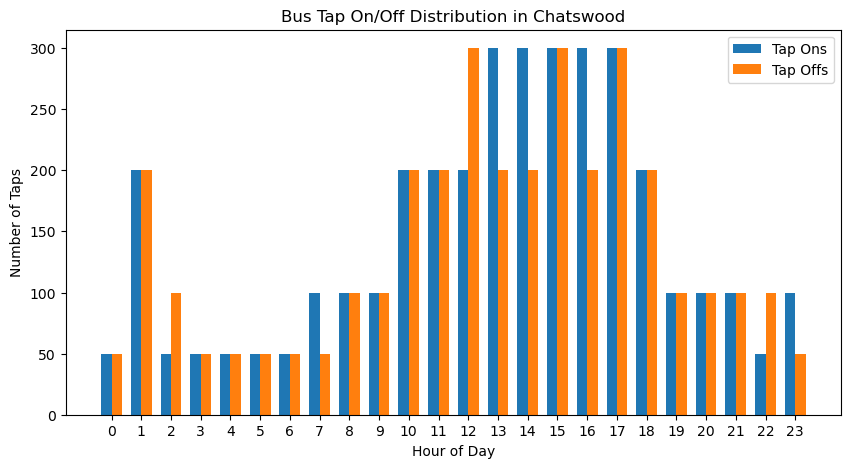

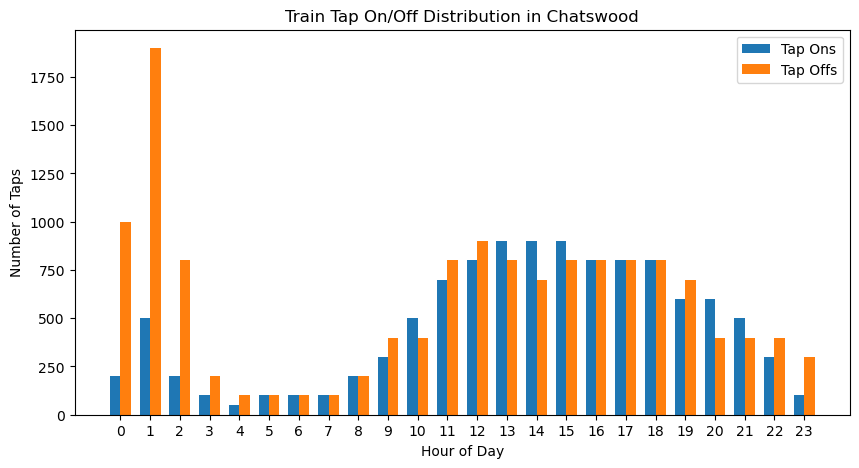

In [15]:
import matplotlib.pyplot as plt
import numpy as np

modes = grouped["mode_name"].unique()

for mode in modes:
    data = grouped[grouped["mode_name"] == mode]
    
    hours = data["tap_hour"].astype(int)  # Ensure integer for sorting
    hours_sorted_idx = np.argsort(hours)
    
    x = np.array(hours)[hours_sorted_idx]
    tap_ons = np.array(data["Tap_Ons"])[hours_sorted_idx]
    tap_offs = np.array(data["Tap_Offs"])[hours_sorted_idx]

    width = 0.35  # Width of each bar
    plt.figure(figsize=(10,5))
    plt.bar(x - width/2, tap_ons, width, label="Tap Ons")
    plt.bar(x + width/2, tap_offs, width, label="Tap Offs")

    plt.xlabel("Hour of Day")
    plt.ylabel("Number of Taps")
    plt.title(f"{mode} Tap On/Off Distribution in {region_of_interest}")
    plt.legend()
    plt.xticks(x)  # Show each hour

    plt.show()


Strange, many people tap off at around 1am, last train home?